## PyTorch Computer Vision

* torchvision - Contains datasets, model architectures and image transformations often used for computer vision problems.
* torchvision.datasets - Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.
* torchvision.models - This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.
* torchvision.transforms - Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.
* torch.utils.data.Dataset - Base dataset class for PyTorch.
* torch.utils.data.DataLoader	- Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

## Getting a dataset

In [2]:
# setup train data
train_data = datasets.FashionMNIST(root='data', # where to download data to?
                                   train=True, # is it train data?
                                   download=True, # download if it doesn't exist
                                   transform=ToTensor(), # images are given in PIL format, so we want them as tensor
                                   target_transform=None) # we can also transform(convert) labels

100%|██████████| 26421880/26421880 [00:03<00:00, 7538204.41it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 136896.42it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:05<00:00, 795266.59it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8080941.99it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# setup test data
test_data = datasets.FashionMNIST(root='data',
                                  train=False,
                                  download=True,
                                  transform=ToTensor())

In [4]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

## Input and output shapes of computer vision model

In [5]:
image.shape # [color_channels=1, width=28, height=28]
# Having color_channels=1 means the image is grayscale.
# If color_channels=3, the image comes in pixel values for red, green and blue.

torch.Size([1, 28, 28])

In [6]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
train_data.data.shape, train_data.targets.shape, test_data.data.shape, test_data.targets.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [8]:
# we can also see our classes
class_names = train_data.classes
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '9')

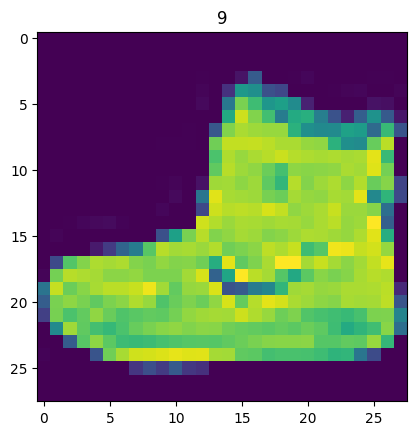

In [9]:
image, label = train_data[0] # note: train_data has two elemets ([28X28], [1])
plt.imshow(image.squeeze())
plt.title(label) # label is represented as number but in actual this number represents type of clothes in out train_data.classes

Text(0.5, 1.0, 'Ankle boot')

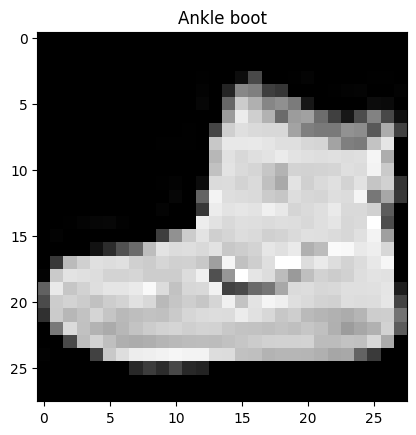

In [10]:
# we can also use cmap parameter for colouring
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

## Preparing DataLoader

In [11]:
# let's see what is DataLoader
# DataLoader helps us to load our data into models
# in other words it helps us to split our data into small chunks or groups of data
# so, let's code our DataLoader to split our data
# we will use termin 'batch' for that chunks our DataLoader splits
# first we should import DataLoader
from torch.utils.data import DataLoader

# important thing is to define batch size(number of elements in one batch)
BATCH_SIZE = 32 # 32 is good batch size for beginning

# now we're turning our data to iterabls(batches)
train_dataloader = DataLoader(train_data, # dataset we want to make iterable
                              batch_size=BATCH_SIZE, # numbers of elements in each batch
                              shuffle=True) # should our data be shuffled every epoch?

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) # it's not unnecessary to shuffle data for testing

# let's print what we will get
print(f'Dataloaders: {train_dataloader} {test_dataloader}')
print(f'Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x7be585967400> <torch.utils.data.dataloader.DataLoader object at 0x7be5859675e0>
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [12]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # note: next() is just one step in iteration
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## Let's see what is Flatten

In [13]:
# because we're working with image data, we should somehow start process the data
# we're going to use nn.Flatten() which compress all dimensions to one single vector
flatten_model = nn.Flatten()

# let's grab data of first image
x = train_features_batch[0] # we're taking first image's data from batch which consists of 32 images as we defined BATCH_SIZE

# flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# in this code cell we turned our weight and height data to one row data

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


## Let's build Model for our data

In [14]:
# we will implement our model like this:
# 1. Data -> Flatten (so we have one single vector which represents image)
# 2. Flatten data -> First Linear layer
# 3. First layer data -> Second Linear layer
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int , hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
         nn.Flatten(), # neural networks like their inputs in vector form
         nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
         nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
                              hidden_units=10, # how many units in the hiden layer
                              output_shape=len(class_names) # one for every class
          )

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Downloading helper functions

In [15]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [16]:
from helper_functions import accuracy_fn
# we will use accuracy_fn for checking accuracy of our taining

## Loss and optimizer functions

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## Device agnostic code

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Let's see what does enumerate() do

In [19]:
my_list = ['apple', 'banana', 'orange']

l1 = ["eat", "sleep", "repeat"]

for index, value in enumerate(my_list):
    print(index, value)

# printing the tuples in object directly
for ele in enumerate(l1):
	print (ele)

# changing index and printing separately
for count, ele in enumerate(l1, 100):
	print (count, ele)

# getting desired output from tuple
for count, ele in enumerate(l1):
	print(count)
	print(ele)


0 apple
1 banana
2 orange
(0, 'eat')
(1, 'sleep')
(2, 'repeat')
100 eat
101 sleep
102 repeat
0
eat
1
sleep
2
repeat


## Timer for calculating how much time does it take to train model

In [20]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

## Training and testing our FashionMNISTModelV0

In [21]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954 | Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989 | Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664 | Test acc: 83.43%

Train time on cpu: 28.405 seconds


## Let's create CNN Model (convolutional neural network)

In [22]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int , hidden_units: int, output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, # here we define number of color channels
                  out_channels=hidden_units,
                  kernel_size=3, # how many pixels should our Conv2d take
                  stride=1, # 1 is default for stride
                  padding=1), # extra pixels on edges
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # by default stride size is equal to kernel size
    )

        # MaxPool Layer just takes maximum value from kernel

    self.block2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block1(x)
    x = self.block2(x)
    x = self.classifier(x)
    return x


torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=1, # input_shape is 1 because we have only one color channel(gray)
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

model_1

FashionMNISTModelV1(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Optimizer and loss function for our FashionMNISTModelV0

In [23]:
loss_fn_CNN = nn.CrossEntropyLoss()
optimizer_CNN = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [24]:
# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        model_1.train()
        # 1. Forward pass
        y_pred = model_1(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn_CNN(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer_CNN.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer_CNN.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_1.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:

            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = model_1(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn_CNN(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end = timer()
total_train_time_model_1 = print_train_time(start=train_time_start,
                                           end=train_time_end,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59394 | Test loss: 0.40718 | Test acc: 85.34%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.36360 | Test loss: 0.34391 | Test acc: 87.21%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.32419 | Test loss: 0.33408 | Test acc: 88.13%

Train time on cpu: 38.137 seconds


## Let's make some predictions

In [25]:
def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass
      pred_logit = model(sample)

      # logit -> pred prob
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob)

  return torch.stack(pred_probs)

In [26]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [27]:
# preds on test samples
pred_probs = make_predictions(model=model_1,
                              data=test_samples)

# first 2 pred probs
pred_probs[:2]

tensor([[1.2271e-06, 3.0045e-07, 7.0975e-07, 2.9327e-06, 4.8934e-07, 9.9978e-01,
         6.4392e-06, 1.4996e-05, 1.3824e-04, 5.8054e-05],
        [4.6303e-02, 5.0791e-01, 3.0003e-03, 1.0679e-01, 8.9162e-02, 5.5699e-04,
         2.4432e-01, 3.6200e-04, 9.2367e-04, 6.7334e-04]], device='cuda:0')

In [28]:
# pred probs -> pred labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1], device='cuda:0')

In [29]:
# what are our results
print(test_labels, pred_classes)

# cheack if our pred labels are correct
list(test_labels) == list(pred_classes)

[5, 1, 7, 4, 3, 0, 4, 7, 1] tensor([5, 1, 7, 4, 3, 0, 4, 7, 1], device='cuda:0')


True